In [1]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path
import glob

In [2]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

def scan_paths(paths: list[Path]) -> bool:
    types = ('*.png', '*.jpg')
    results = []
    for path in paths:
        if path.is_dir():
            files_grabbed = []
            for files in types:
                files_grabbed.extend(path.glob(files))
            print('In {} found {} images'.format(path.stem, len(files_grabbed)))
            results.append((len(files_grabbed) > 0, files_grabbed))
        else:
            results.append((False, []))
    return results

def get_images(paths: list[Path]):
    results = []
    for path in paths:
        sub_results = []
        for image_path in path[1]:
            image = cv2.imread(str(image_path))
#             sub_results.append(bgr_to_rgb(image))
            sub_results.append(bgr_to_rgb(image))
        results.append(sub_results)
    return results

def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def rgb_to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def show_images(images):
    fig = plt.figure(figsize=(8, 8))
    columns = len(images)
    rows = 1
    for i in range(0, columns*rows):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(images[i])
    plt.show()

In Original found 9 images
In IBM found 9 images
In SRGAN found 9 images
In Linear found 9 images


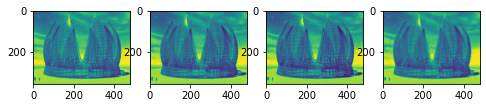

For 1 image:

Original vs IBM MSE: 250.75   SSIM: 65.04 %

Original vs SRGAN MSE: 251.84   SSIM: 66.88 %

Original vs Linear MSE: 277.88   SSIM: 66.98 %



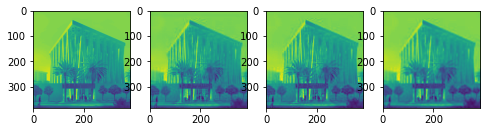

For 2 image:

Original vs IBM MSE: 224.36   SSIM: 68.73 %

Original vs SRGAN MSE: 203.31   SSIM: 69.45 %

Original vs Linear MSE: 193.04   SSIM: 70.96 %



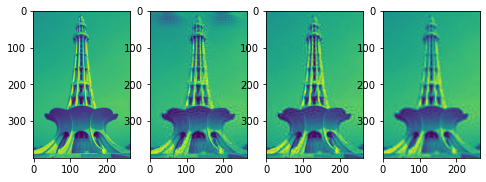

For 3 image:

Original vs IBM MSE: 352.00   SSIM: 72.20 %

Original vs SRGAN MSE: 234.70   SSIM: 79.94 %

Original vs Linear MSE: 275.70   SSIM: 81.77 %



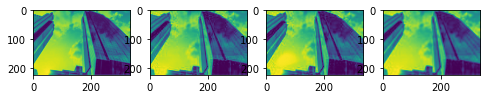

For 4 image:

Original vs IBM MSE: 392.52   SSIM: 63.43 %

Original vs SRGAN MSE: 355.36   SSIM: 65.18 %

Original vs Linear MSE: 375.96   SSIM: 66.09 %



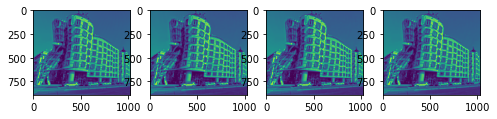

For 5 image:

Original vs IBM MSE: 488.94   SSIM: 67.03 %

Original vs SRGAN MSE: 395.97   SSIM: 70.14 %

Original vs Linear MSE: 442.48   SSIM: 68.73 %



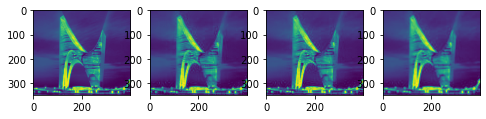

For 6 image:

Original vs IBM MSE: 517.36   SSIM: 73.56 %

Original vs SRGAN MSE: 459.60   SSIM: 75.65 %

Original vs Linear MSE: 491.50   SSIM: 76.19 %



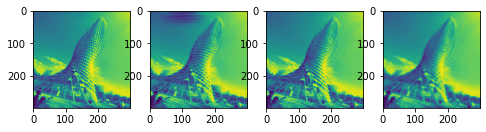

For 7 image:

Original vs IBM MSE: 652.60   SSIM: 62.99 %

Original vs SRGAN MSE: 449.35   SSIM: 70.33 %

Original vs Linear MSE: 446.58   SSIM: 70.42 %



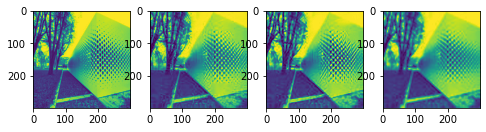

For 8 image:

Original vs IBM MSE: 1523.54   SSIM: 48.12 %

Original vs SRGAN MSE: 1600.13   SSIM: 49.50 %

Original vs Linear MSE: 1522.57   SSIM: 46.34 %



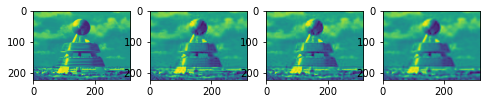

For 9 image:

Original vs IBM MSE: 567.86   SSIM: 70.47 %

Original vs SRGAN MSE: 475.05   SSIM: 72.59 %

Original vs Linear MSE: 483.29   SSIM: 73.85 %



In [3]:
originals_path = Path('./Original')
ibm_path = Path('./IBM')
srgan_path = Path('./SRGAN')
linear_path = Path('./Linear')

results = scan_paths([originals_path, ibm_path, srgan_path, linear_path])
assert sum([t[0] for t in results]) == len(results)

images = get_images(results)
compares = ['Original vs IBM',
           'Original vs SRGAN',
           'Original vs Linear']
names = ['Original',
         'IBM',
         'SRGAN',
         'Linear']

means = []
for i in range(len(images[0])):
    batch = []
    mses = []
    ssims = []
    for image in images:
        batch.append(rgb_to_gray(image[i]))
    show_images(batch)
    print('For {} image:\n'.format(str(i+1)))
    
    for j in range(len(batch) - 1):
        mses.append(mse(batch[0], batch[j + 1]))
        ssims.append(ssim(batch[0], batch[j + 1]) * 100)
        print('{} MSE: {:.2f}   SSIM: {:.2f} %\n'.format(compares[j], mses[-1], ssims[-1]))
    means.append(sum(mses) / len(mses))
